In [27]:
import pandas as pd
import numpy as np

In [28]:
excel_data_df = pd.ExcelFile(r'../data/data.xlsx')
excel_data_df = excel_data_df.parse(excel_data_df.sheet_names[0])

In [29]:
for idx, header in enumerate(excel_data_df.columns.tolist()):
    print(idx, header)

0 Dấu thời gian
1 1. Bạn tên là 
2 2. Ngày sinh
3 3. Số điện thoại
4 4. Bạn đến từ trường nào
5 5. Bạn đang là sinh viên:
6 6. MSSV
7 7. Link Facebook
8 8. Outlook
9 9. Gmail
10 10. Trình độ tiếng anh
11 11. Bạn mong muốn tham gia vào ban
12 1. CV của bạn:
13 3. Bạn đang quan tâm về lĩnh vực nào? Bạn đã biết gì về lĩnh vực này?
14 4. Bạn có dự án nào không? Nếu có, bạn hãy điền link Github có những dự án của bạn?
15 6. Bạn nghĩ mình có thể đóng góp gì cho SINNO với tư cách là thành viên ban Chuyên Môn?
16 7. Ngoài mong muốn được học hỏi, bạn còn có mong muốn gì khi trở thành một thành viên của ban Chuyên Môn?
17 8. Hãy nêu chi tiết một ý tưởng về công nghệ mà bạn đang muốn thực hiện.
18 1. Bạn đã từng làm cán bộ lớp hoặc tham gia các tổ chức, CLB, Đội nào chưa? Vai trò của bạn là gì?
19 2. Khi ở một môi trường mới, bạn có hòa đồng/chủ động làm quen với những người xung quanh không? Cho chúng mình biết lý do nhé.
20 3. Mức thành thạo tin học văn phòng (Word, Excel,...)
21 4. Link một Pl

In [30]:
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Nhân sự")]
excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Đối ngoại")]
excel_data_df.fillna("", inplace = True)
identity = list(excel_data_df.index.values)

In [31]:
import sys; sys.path.insert(0, '..')
from app.loader import loader
from app.ssmc_fcm import SSMC_FCM

In [32]:
fields_idx = {
    29: loader.multilabel_binarizing,
    30: loader.multilabel_binarizing,
    31: loader.feature_engineering,
    32: loader.feature_engineering,
    36: loader.feature_engineering,
}

In [33]:
dataset = None
data_field_len = []
for idx, func in fields_idx.items():
    raw_data = excel_data_df.iloc[:, idx].tolist()
    data = func(raw_data)
    dataset = data if dataset is None else np.hstack((dataset, data))
    data_field_len.append(data.shape[1])
dataset.shape, data_field_len

((24, 2351), [24, 23, 768, 768, 768])

Supervised percentage: 0.0% (0:24)
Cluster members: 
[41, 42, 44, 45, 47, 49, 50, 54, 59, 61, 63]
[43, 46, 48, 51, 53, 57, 60, 62, 64]
[]
[55]
[52, 56, 58]


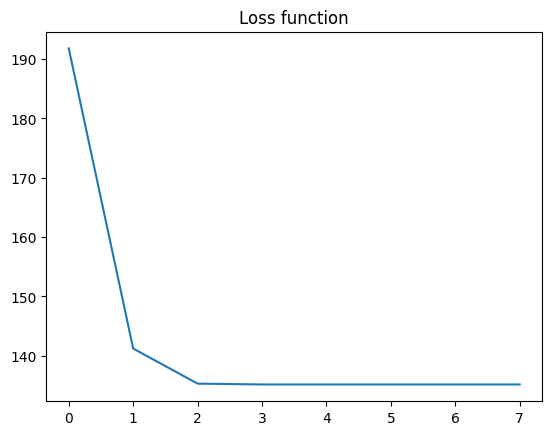

loss functions: 
[191.79218358127355, 141.2124436504589, 135.29839809965233, 135.15933900680648, 135.156851193674, 135.15678209444374, 135.15677950166426, 135.15677939138192]


In [34]:
supervised_set = [
    
]
ssmc_fcm = SSMC_FCM(
    dataset=dataset, 
    fields_len=data_field_len,
    fields_weight=[2, 3, 1, 1, 1],
    n_clusters=5, 
    identity=identity,
    supervised_set=supervised_set, 
)
ssmc_fcm.clustering()
ssmc_fcm.show_cluster_members()
ssmc_fcm.show_loss_function()

In [35]:
for cluster in ssmc_fcm.pred_labels:
    display(excel_data_df.loc[cluster].iloc[:, [1, 5, *list(fields_idx.keys())]])

,1. Bạn tên là,5. Bạn đang là sinh viên:,1. Liệt kê 3 điểm mạnh và 3 điểm yếu của bạn?,"2. Bạn đã từng làm cán bộ lớp hoặc tham gia các tổ chức, CLB, Đội, Nhóm nào chưa? Nếu có hãy kể 1 trải nghiệm thú vị.",3. Bạn có mong muốn gì nếu được trở thành một phần của Ban Đối Ngoại?,"4. Khi muốn làm quen với một ai đó, bạn sẽ làm gì? Tại sao?",4. Bạn mong muốn nhận được gì từ phía CLB SINNO?
41,Nguyễn Thị Hương Giang,K65,"Điểm mạnh: tự tin, tư duy logic, quyết đoán\nĐ...",Từng tham gia một clb hồi cấp 3. Hiện tại có t...,Bên cạnh việc hoàn thiện hơn các kĩ năng mềm k...,"Đầu tiên là các bước làm quen cơ bản, sau đó m...",Kiến thức và kỹ năng
42,Võ Văn Tuấn,K66,Điểm mạnh: -Thích giao tiếp\n- Ham học hỏi\n- ...,Chưa nhưng đã tham gia một vài hoạt động đoàn ...,Được tiếp xúc với nhiều người khác nhau,Có thế inbox trực tiếp nếu được hoặc liên hệ q...,Kinh nghiệm sống và các mối quan hệ
44,Nguyễn Trung Hiếu,K66,"Điểm mạnh của em là khả năng giao tiếp, làm vi...",Em hiện là lớp trưởng lớp ME-E1 01 ạ. Đồng thờ...,Em muốn phát triển bản thận hơn đồng thời tron...,Khi muốn làm quen 1 ai đó em sẽ tìm hiểu qua v...,Em muốn tìm thêm cơ hội để phát triển bản thân ạ
45,Mạc Đình Phú,K64,"Điểm mạnh: chăm chỉ, tiếp thu tốt, đam mê\nĐiể...",Chủ nhiệm CLB guitar Đội tình nguyện viện CNTT...,"Trau dồi kĩ năng, mở rộng hiểu biết, có nhiều ...",Tìm hiểu sở thích của họ qua những người mình ...,Sự quan tâm của mọi người và những bài học bổ ích
47,Đỗ Thành Long,K63,Điểm mạnh : chăm chỉ ham học hỏi Điểm yếu : nh...,Chưa,Giúp đỡ được những người giống như bản thân,"Quan sát, tìm hiểu cách giao tiếp đối phương v...",Được tham gia và giao lưu cùng mọi người
49,Hà Anh Vũ,K65,3 điểm mạnh của mình: \n- Có khả năng giao tiế...,Mình đã từng tham gia CLB Tổ chức sự kiên và R...,Mình muốn học hỏi thêm các kĩ năng về giao tiế...,"Trước hết, mình thường tìm điểm chung giữa 2 n...",Mình rất muốn học thêm các kĩ năng mềm cũng nh...
50,Đỗ Đức Phương,K65,"Điểm mạnh: Hòa đồng, năng động, có tính kỉ luậ...",Bí thư lớp KHMT06 - K65,Cải thiện kĩ năng giao tiếp,Đầu tiên mình sẽ tự giới thiệu về bản thân trư...,"Học được thêm nhiều kĩ năng, quen được thêm nh..."
54,Hoàng Quốc Trung,K65,* Điểm mạnh: \n1) Nhiệt tình năng nổ với các h...,Đã từng làm Lớp phó THPT trong 3 năm.\nĐã tổ c...,"Được tiếp xúc nhiều người, được sống và hoạt đ...","- Hỏi những câu hỏi mang tính rào đón: VD: ""Bạ...",Một môi trường mới và những thử thách mới
59,Nguyễn Thị Vân Anh,K65,Điểm mạnh: tỉ mỉ; năng động; ham học hỏi\nĐiểm...,"Mình đã từng làm cán bộ lớp (lớp trưởng, lớp p...",- Hiểu được cách hoạt động của ban Đối Ngoại c...,"Khi muốn làm quen với người A, trước tiên mình...",
61,Vũ Chí Thành,K65,Điểm mạnh:\n1. Năng nổ trong các hoạt động\n2....,Chưa,"- Phát triển kỹ năng giao tiếp, đối ngoại\n- L...",Đầu tiên mình sẽ tìm điểm chung/ mục tiêu chun...,Không


,1. Bạn tên là,5. Bạn đang là sinh viên:,1. Liệt kê 3 điểm mạnh và 3 điểm yếu của bạn?,"2. Bạn đã từng làm cán bộ lớp hoặc tham gia các tổ chức, CLB, Đội, Nhóm nào chưa? Nếu có hãy kể 1 trải nghiệm thú vị.",3. Bạn có mong muốn gì nếu được trở thành một phần của Ban Đối Ngoại?,"4. Khi muốn làm quen với một ai đó, bạn sẽ làm gì? Tại sao?",4. Bạn mong muốn nhận được gì từ phía CLB SINNO?
43,Nguyễn Trường Giang,K64,Điểm mạnh:\n+ Thích nghi\n+ Thân thiện\n+ Lạc ...,"Em đã và đang tham gia đóng góp, tổ chức một s...",Học và thực hiện được các nhiệm vụ đề ra của B...,Khi làm quen sẽ cố gắng hỏi tên người đó và gh...,Cơ hội được trở thành một thành viên của SINNO...
46,Nguyễn Thu Trang,K66,"điểm mạnh: kỹ năng giao tiếp tốt, năng động, t...",em chưa từng tham gia,em mong muốn được tiếp thu thêm nhiều kiến thứ...,khi muốn làm quen với 1 ai đó em sẽ điều chỉnh...,em mong muốn được CLB SINNO nhận làm thành viên ạ
48,Nguyễn Trung Hiếu,K64,"3 điểm mạnh: tư duy ổn định, có tinh thần học ...","Lớp phó học tập 2 năm cấp 3, lớp trưởng lớp t...",Mình muốn có cơ hội giao lưu với mọi người nhi...,"Khi làm quen với một ai đó, điều đầu tiên mình...","sự quan tâm, chia sẻ kinh nghiệm của mọi người..."
51,Trần Hồ Khánh Ly,K66,"Điểm mạnh: Sẵn sàng học hỏi, biết lắng nghe, c...","Khoảng thời học cấp 3, mình có tham gia đội tu...",- Môi trường tốt để phát triển\n- Nâng cao kĩ ...,Tìm hiểu trước về người đó (thông qua mạng xã ...,- Môi trường hoạt động chất lượng\n- Lời khuyê...
53,Vũ Duy Quý,K66,"Điểm mạnh : Nhanh nhẹn , nói chuyện tốt , giọn...",Từng làm tổ trưởng hồi cấp 3,Có,"Nói chuyện nghiêm túc , thành thật và cảm nhận...",Mong sự tiếp đón và giúp đỡ từ những người anh...
57,Hồ Minh Nhật,K65,"Điểm mạnh: - Dễ hoà nhập, thích trải nghiệm, l...",Mình từng tham gia ichange Summer Camp được tổ...,"Muốn được trải nghiệm, muốn được đi đây đi đó ...","Trước khi làm quen, mình sẽ quan sát, tìm hiểu...",Ny
60,Trần Xuân Lộc,K65,"Nhiệt tình, năng nổ, có tinh thần trách nhiệm....",Đã từng tham gia nhóm trong phạm vi lớp. Đó là...,Giúp câu lạc bộ kết nối được với nhiều cá nhân...,"Tìm đề tài chung để bắt chuyện, có thể bàn luậ...","Được học hỏi, giúp đỡ các thành viên trong CLB..."
62,Lê Nhật Đức,K66,"3 điểm mạnh: hòa đồng, nhanh nhảu trong công v...",Em chưa từng làm cán bộ lớp hoặc tham gia tổ c...,Em mong muốn được cải thiện những điểm yếu của...,"Khi muốn làm quen với ai đó, em sẽ có 1 khoảng...","Em mong muốn nhận được nhiều mối quan hệ hơn, ..."
64,Hà Duy Bách,K66,"- Điểm mạnh : luôn tiếp thu và học hỏi, thích ...",Hiện tại em là lớp trưởng của lớp CNTT Việt Nh...,Em mong muốn góp sức lực của mình đưa CLB lớn ...,Lần đầu bắt chuyện em sẽ bắt đầu bằng một lời ...,Em mong muốn nhận được sự quan tâm từ các anh ...


,1. Bạn tên là,5. Bạn đang là sinh viên:,1. Liệt kê 3 điểm mạnh và 3 điểm yếu của bạn?,"2. Bạn đã từng làm cán bộ lớp hoặc tham gia các tổ chức, CLB, Đội, Nhóm nào chưa? Nếu có hãy kể 1 trải nghiệm thú vị.",3. Bạn có mong muốn gì nếu được trở thành một phần của Ban Đối Ngoại?,"4. Khi muốn làm quen với một ai đó, bạn sẽ làm gì? Tại sao?",4. Bạn mong muốn nhận được gì từ phía CLB SINNO?


,1. Bạn tên là,5. Bạn đang là sinh viên:,1. Liệt kê 3 điểm mạnh và 3 điểm yếu của bạn?,"2. Bạn đã từng làm cán bộ lớp hoặc tham gia các tổ chức, CLB, Đội, Nhóm nào chưa? Nếu có hãy kể 1 trải nghiệm thú vị.",3. Bạn có mong muốn gì nếu được trở thành một phần của Ban Đối Ngoại?,"4. Khi muốn làm quen với một ai đó, bạn sẽ làm gì? Tại sao?",4. Bạn mong muốn nhận được gì từ phía CLB SINNO?
55,Nguyễn Minh Tuấn,K66,Điểm mạnh:\n1. Ứng biến tốt. \n2. Khá cầu toàn...,Chưa ạ :(,"Có cơ hội gặp gỡ, làm quen với nhiều người và ...",Khi muốn làm quen với ai đó thì nếu có thể em ...,Sự giúp đỡ của các anh chị ạ.


,1. Bạn tên là,5. Bạn đang là sinh viên:,1. Liệt kê 3 điểm mạnh và 3 điểm yếu của bạn?,"2. Bạn đã từng làm cán bộ lớp hoặc tham gia các tổ chức, CLB, Đội, Nhóm nào chưa? Nếu có hãy kể 1 trải nghiệm thú vị.",3. Bạn có mong muốn gì nếu được trở thành một phần của Ban Đối Ngoại?,"4. Khi muốn làm quen với một ai đó, bạn sẽ làm gì? Tại sao?",4. Bạn mong muốn nhận được gì từ phía CLB SINNO?
52,Nguyễn Thu Hiền,K65,Điểm mạnh:\n-Nhiệt tình\n-khả năng giao tiếp t...,Mình đã và đang tham gia các cuộc thi về kinh ...,Việc đăng kí vào Ban Đối Ngoại của SINNO là mộ...,"Khi muốn làm quen với một ai đó, mình sẽ xem x...","Mình mong muốn được hỏi hỏi, phát triển và thử..."
56,Nguyễn Thị Phương Thùy,K65,"Ba điểm mạnh: năng động, tự tin, có tinh thần ...",Em từng là tình nguyện viên của Đội SVTN viện ...,"Em muốn được trau dồi bản thân nhiều hơn, được...",Đầu tiên em sẽ hỏi tên và một số thông tin của...,Em muốn được trở thành một thành viên của SINN...
58,Đinh Thái Sơn,K66,"3 điểm mạnh của mình lần lượt là: Thứ nhất, có...","Mình tham gia câu lạc bộ BKSEC, lần đầu vào th...",Nếu được trở thành một phần của Ban Đối Ngoại ...,Đầu tiên mình sẽ tham khảo về thông tin của bạ...,Mình muốn trước hết có thể tham gia vào CLB SI...
